# 주차 인식 프로그램 OPENCV --version

첫번째 필요한 패키지들을 임포트 한다

import numpy as np                >>    파이썬에 수치 numpy를 임포트

import cv2                        >>    opencv를 임포트 

import matplotlib.pyplot as plt   >>    데이터를 시각화해서 보여줄 함수를 임포트 시킨다

%matplotlib inline                >>    시각화 한것을 jupyter note북에 보여주는 명령어

In [1]:
import numpy as np                  
import cv2                           
import matplotlib.pyplot as plt      
%matplotlib inline                   

## cap = cv2.VideoCapture(1)
##### opencv의 VideoCapture를 활용해서 컴퓨터 내의 1번 카메라와 연결시킨다
## cv2.VideoWriter( )
##### 첫번째 파라미터는 저장할 파일이름, 
##### 두번째 파라미터는 파일 형식 
##### 셋번째 파라미터는 초당 프레임을 얼마나 가져올건지 여기서는 20
##### 네 번째 파라미터는 비디오를 저장할 사이즈

In [ ]:
cap = cv2.VideoCapture(1)            # opencv의 VideoCapture를 활용해서 컴퓨터 내의 1번 카메라와 연결시킨다

frame_size = (int(cap.get(3)),        # 비디오를 저장할 사이즈를 정해준다
             int(cap.get(4)))

fourcc = cv2.VideoWriter_fourcc(*'XVID')                           # 비디오의 파일 형식을 지정한다

out1 = cv2.VideoWriter('비디오결과4.mp4',fourcc,20.0,frame_size)   # cv2.VideoWrite를 활용해서 
                                                                   # 첫번째 파라미터는 저장할 파일이름
                                                                   # 두번째 파라미터는 파일 형식
                                                                   # 셋번째 파라미터는 초당 프레임을 얼마나 가져올건지 여기서는 20
                                                                   # 비디오를 저장할 사이즈


### cv2.resize 로 img변수에 저장된 이미지를 cv2.resize를 활용해서 640,480 사이즈로 변환한다
### shape이라는 함수로 이미지의 shape으로 높이(648) 너비(480) 채널(3) 값을 변수에 대입한다
### cv2.cvtColor( ) 함수로 이미지가 컬러이미지를 gray스케일로 변환한다 
##### 왜냐면 컴퓨터가 인식하기엔 그레이스케일이 채널이 하나이기 때문에 계산량도 줄고 인식하기에도 편하기 때문입니다

In [ ]:
while True:
    ret,img =  cap.read()                                          #cap 변수에 저장된 영상을 read()함수로 읽어와서 ret와 img에 저장한다
    img = cv2.resize(img,(640,480),fx=0,fy=0)                      # img변수에 저장된 이미지를 cv2.resize를 활용해서 640,480 사이즈로 변환한다
    height,width,channel = img.shape                               # 이미지의 shape으로 높이(648) 너비(480) 채널(3) 값을 변수에 대입한다
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                    # 이미지가 컬러이미지이기때문에 이미지를 gray스케일로 변환하기위해

## cv2.GaussianBlur( )
###  이미지의 노이즈 값들을 제거할때 사용 가능하다
### 노이즈를 제거하는 이유는?
#### 이미지에서 threshold 또는 findContour를 사용할때 노이즈 값들이 있으면 그 값들도 같이 표시하기때문에 불필요한 데이터를 가져와버린다

In [ ]:
img_blurred = cv2.GaussianBlur(gray,ksize=(5,5),sigmaX=0)      # cv2.GaussianBlur를 활용해 이미지의 노이즈를 제거한다  

## cv2.adaptiveThreshold( )
#### 이미지의 값을 0또는 255오로 변환시킨다 >> 이미지에서 흰색 또는 검은색으로 나타낸다는 말입니다
### 첫번째 파라미터는 이미지
### 두번째 파라미터는  이미지 픽셀의 최대 값을 255.0으로 지정
### 세번째 파라미터는 
###### cv2.ADAPTIVE_THRESH_GAUSSIAN_C  임계값은 가중치 가우시안 윈도우인 이웃값의 가중치 합입니다
###### cv2.ADAPTIVE_THRESH_MEAN_C  임계값은 가중치의 평균의 합
### 네번째 파라미터는 임계값처리를 어떤 방향으로 할건지 정해준다
###  다섯번째 파라미터는 인접 지역의 크기를 결정한다
### 여섯번째 파라미터는 계산된 평균 또는 가중 평균에서 빼는 상수

In [ ]:
img_thresh = cv2.adaptiveThreshold(                            
                    img_blurred,                                   
                    maxValue = 255.0,
                    adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,    
                    thresholdType = cv2.THRESH_BINARY_INV,
                    blockSize=19,                                       
                    C=9                                     
                    )

## cv2.findContours( )
#### 외각선을 따올수잇는 findContour함수를 이용한다
### 첫번째 파라미터는 이미지
### 두번째 파라미터는 contour 찾는 방법(모드)
###### cv2.RETR_EXTERNAL	컨투어 라인 중 가장 바깥쪽의 라인만 찾음
###### cv2.RETR_LIST	모든 컨투어 라인을 찾지만, 상하구조(hierachy)관계를 구성하지 않음
###### cv2.RETR_CCOMP	모든 컨투어 라인을 찾고, 상하구조는 2 단계로 구성함
###### cv2.RETR_TREE	모든 컨투어 라인을 찾고, 모든 상하구조를 구성함
### 세번째 파라미터는 컨투어를 표현하는 방법
###### cv2.CHAIN_APPROX_NONE	모든 컨투어 포인트를 반환
###### cv2.CHAIN_APPROX_SIMPLE	컨투어라인을 그릴 수 있는 포인트만 반환
###### cv2.CHAIN_APPROX_TC89_L1	Teh_Chin 연결 근사 알고리즘을 적용하여 컨투어 포인트를 줄임
###### cv2.CHAIN_APPROX_TC89_KCOS	Teh_Chin 연결 근사 알고리즘을 적용하여 컨투어 포인트를 줄임

In [ ]:
_, contours, _=cv2.findContours(
                    img_thresh,
                    mode = cv2.RETR_LIST, 
                    method = cv2.CHAIN_APPROX_SIMPLE 
                    )   

## 찾은 contour를 cv2.boundingRect( ) 함수를 이용해 x,y,w,h를 가져온다
### 가져온 정보를 contour_dict에 딕셔너리 형태로 리스트에 추가시킨다

In [ ]:
temp_result = np.zeros((height,width,channel),dtype=np.uint8)
    contour_dict = []
    for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        contour_dict.append({
                'contour':contour,
                'x':x,
                'y':y,
                'w':w,
                'h':h,
                'cx':x+(w/2),
                'cy':y+(h/2)
                })

## 예를 들어서 보여주는 사진과 코드

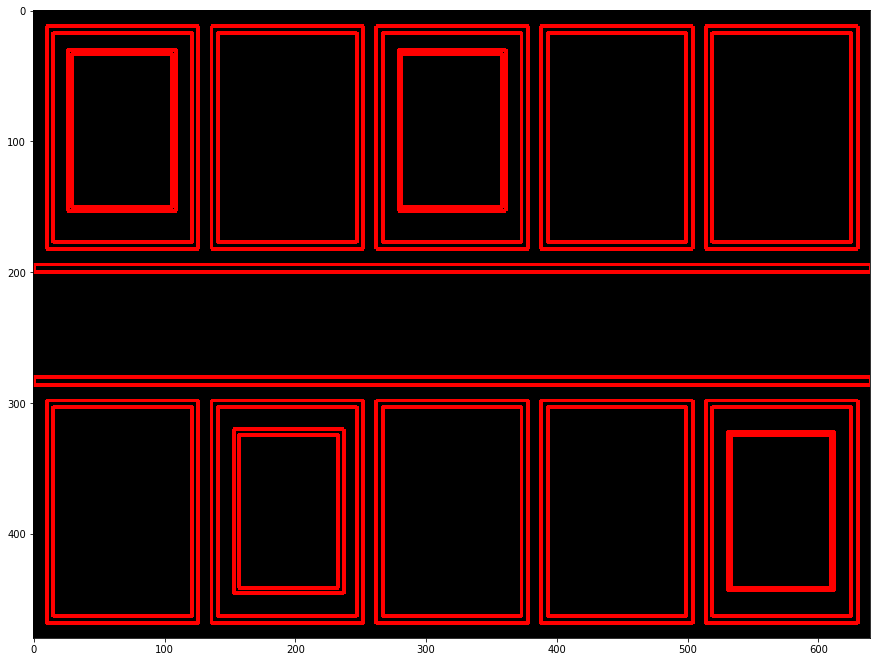

In [12]:

img = cv2.imread('park3.png')
img = cv2.resize(img,(640,480),fx=0,fy=0)
height, width,channel = img.shape
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_blurred = cv2.GaussianBlur(gray,ksize=(5,5),sigmaX=0)
img_thresh = cv2.adaptiveThreshold(
                img_blurred,
                maxValue = 255.0,
                adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,    #임계값은 가중치 가우시안 윈도우인 이웃값의 가중치 합입니다.
                thresholdType = cv2.THRESH_BINARY_INV,
                blockSize=19,                                       #인접 지역의 크기를 결정합니다.
                C=9                                                #계산 된 평균 또는 가중 평균에서 빼는 상수입니다.
                )
_, contours, _=cv2.findContours(
                img_thresh,
                mode = cv2.RETR_LIST,                               #contour간 계층구조 상관관계를 고려하지 않고 contour를 추출
                method = cv2.CHAIN_APPROX_SIMPLE                   #contour 근사 방법
)
# mode = cv2.RETR_LIST >> 모든 컨투어 라인을 찾지만, 상하구조(hierachy)관계를 구성하지 않음
#cv2.CHAIN_APPROX_SIMPLE >> 컨투어라인을 그릴 수 있는 포인트만 반환

temp_result = np.zeros((height,width,channel),dtype=np.uint8)

contour_dict = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result,pt1=(x,y),pt2=(x+w,y+h),color=(255,0,0),thickness=2)
    contour_dict.append({
            'contour':contour,
            'x':x,
            'y':y,
            'w':w,
            'h':h,
            'cx':x+(w/2),
            'cy':y+(h/2)
    })

plt.figure(figsize=(15,15))
plt.imshow(temp_result,cmap='gray')

plt.show()
#cv2.imshow('park',temp_result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### 정보가 입력된 컨투어의 사각형 중에서 정말 주차장 같이 생긴 사각형을 골라낸다
# 아래 정보는 조건 파라미터

In [ ]:
MIN_AREA = 1000                       # 최소 면적
MIN_WIDTH,MIN_HEIGHT = 30,50         #  최소 너비,최소 높이
MIN_RATIO,MAX_RATIO = 0.25,1.0      # 최대, 최소비율
MAX_AREA = 10000                    # 최대 면적
MAX_HEIGT = 160                     # 최대 높이
MAX_WIDTH =  90                     # 최대 높이

possible_contours=[]                # 가능한 컨투어를 담을 리스트
idx = 0                             # index를 표시할 숫자

면적 = width * height

비율 = width / height
## if문을 활용해 조건이 맞는 애들만 possible_contours에 추가하겟다
#### 추가할때 인덱스 값도 같이 추가한다

In [ ]:
for c in contour_dict:
    area = c['w'] * c['h']    # 면적
    ratio = c['w'] / c['h']   #비율
        #조건을 써서 조건에 맞는 컨투어만 사용한다
    if area> MIN_AREA \
        and area < MAX_AREA\
        and c['h'] < MAX_HEIGT and c['w'] < MAX_WIDTH \
        and c['w'] > MIN_WIDTH and c['h'] > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
        c['idx'] = idx
        idx += 1
        possible_contours.append(c)

### 예를 들면 사진과 코드

14


<function matplotlib.pyplot.show(*args, **kw)>

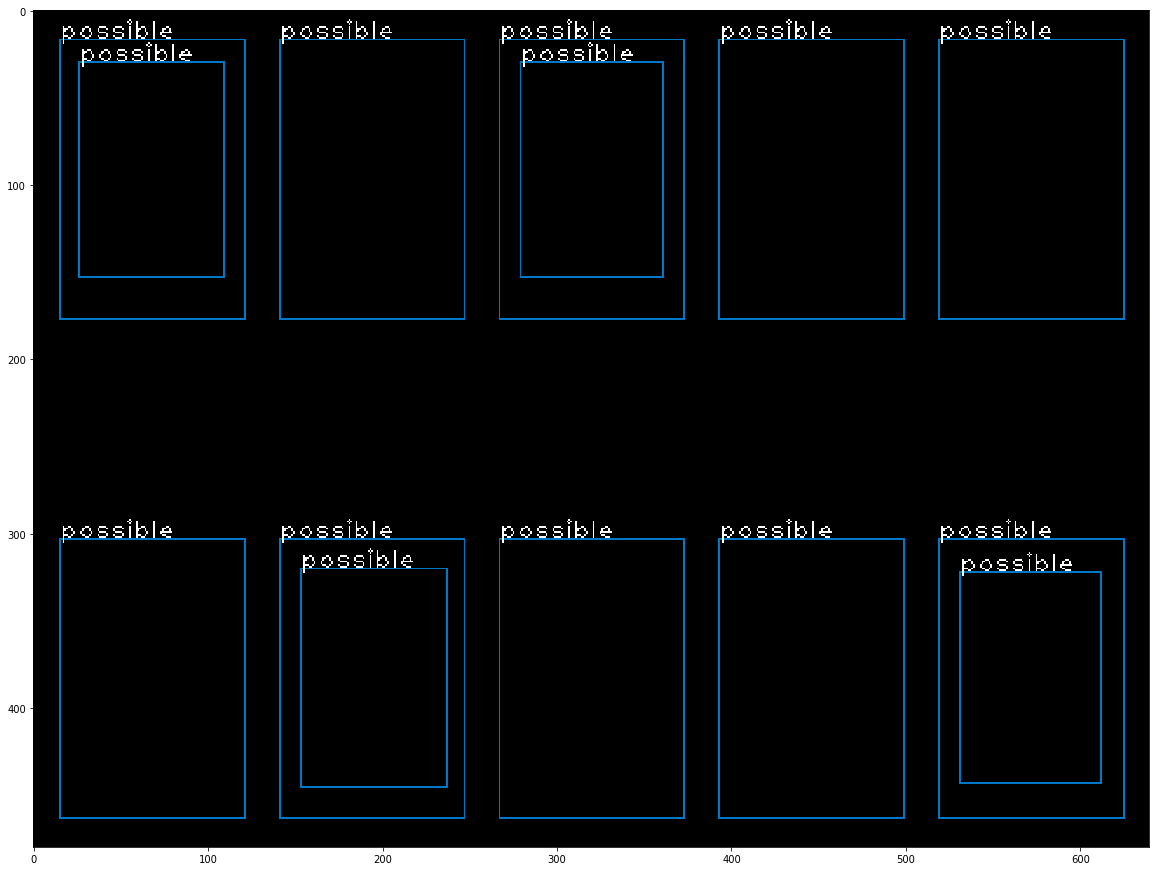

In [3]:
img = cv2.imread('park3.png')
img = cv2.resize(img,(640,480),fx=0,fy=0)
height, width,channel = img.shape
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_blurred = cv2.GaussianBlur(gray,ksize=(5,5),sigmaX=0)
img_thresh = cv2.adaptiveThreshold(
                img_blurred,
                maxValue = 255.0,
                adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,    #임계값은 가중치 가우시안 윈도우인 이웃값의 가중치 합입니다.
                thresholdType = cv2.THRESH_BINARY_INV,
                blockSize=19,                                       #인접 지역의 크기를 결정합니다.
                C=9                                                #계산 된 평균 또는 가중 평균에서 빼는 상수입니다.
                )
_, contours, _=cv2.findContours(
                img_thresh,
                mode = cv2.RETR_LIST,                               #contour간 계층구조 상관관계를 고려하지 않고 contour를 추출
                method = cv2.CHAIN_APPROX_SIMPLE                   #contour 근사 방법
)
# mode = cv2.RETR_LIST >> 모든 컨투어 라인을 찾지만, 상하구조(hierachy)관계를 구성하지 않음
#cv2.CHAIN_APPROX_SIMPLE >> 컨투어라인을 그릴 수 있는 포인트만 반환

temp_result = np.zeros((height,width,channel),dtype=np.uint8)

contour_dict = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    contour_dict.append({
            'contour':contour,
            'x':x,
            'y':y,
            'w':w,
            'h':h,
            'cx':x+(w/2),
            'cy':y+(h/2)
    })

MIN_AREA = 8000                       # W*H 면적의 넓이를 제한한다
MIN_WIDTH,MIN_HEIGHT = 80,120         # W의 길이와 H길이를 제한한다 W > 8  & H > 15
MIN_RATIO,MAX_RATIO = 0.25,1.0      # 최대비율 최소비율을 정한다
MAX_AREA = 18000

possible_contours=[]
cnt = 0
for d in contour_dict:
    area = d['w'] * d['h']    # 면적
    ratio = d['w'] / d['h']   #비율
    #조건을 써서 조건에 맞는 컨투어만 사용한다
    if area> MIN_AREA \
        and area < MAX_AREA\
        and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)
print(len(possible_contours))
for d in possible_contours:
    cv2.rectangle(temp_result,pt1=(d['x'],d['y']),pt2=(d['x']+d['w'],d['y']+d['h']),color = (0,120,200),thickness=1)
    cv2.putText(temp_result,'possible' , (d['x'], d['y']), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255))
plt.figure(figsize=(20,20))    
plt.imshow(temp_result,cmap='gray')
plt.show

# possible_contours 에서도 주차가 된 곳을 찾겟다 라는 조건  

In [ ]:
MAX_AREA1 = 3000                 #최대 면적 3000 미만으로 
MAX_WIDTH ,MAX_HEIGHT = 60,75    # 최대 너비 높이 60미만 75미만 
MAx_AREA2 = 4000                 # 최대 면적 4000 미만으로

inside_contour = []              # 주차가 된 차량을 뽐을 컨투어를 저장할 공간
bad_contour = []                 # 잘못된 정보를 가진 컨투어를 저장할 공간
unside_contour = []              # 위 조건이 아애 안맞는 컨투어 정보를 저장할 공간

# filltering 하는 과정

In [ ]:
for c1 in possible_contours:
        area1 = c1['w'] *c1['h']
        if area1 < MAX_AREA1 \
        and c1['w']< MAX_WIDTH \
        and c1['h'] < MAX_HEIGHT:
            inside_contour.append(c1['idx'])
        elif area1 < MAx_AREA2:
            bad_contour.append(c1['idx'])
        else:
            unside_contour.append(c1['idx'])

## np.take( ) 함수로 가져온 정보를 합지는 과정

In [ ]:
matched_contour = np.take(possible_contours,inside_contour)
unmatched_contour = np.take(possible_contours,unside_contour

### 주차 정보 입력

In [ ]:
parking_result = len(matched_contour)    #  >> 주차된 갯수
parking_size =  round(len(unmatched_contour)/2)   #>> 주차장 크기
parking_empty = round((len(unmatched_contour)/2) - len(matched_contour)) # 주차장 사이즈 - 주차된 갯수 = 주차 가능공간    

## cv2.rectangle( ) 함수로
#### 인식되는 주차장을 그려준다

In [ ]:
for c in unmatched_contour:
    cv2.rectangle(temp_result,pt1=(c['x'],c['y']),pt2=(c['x']+c['w'],c['y']+c['h']),color = (255,255,255),thickness=1)  

## cv2.rectangle( ) 함수로
#### 인식되는 주차가 된 주차 공간을 그려준다
## cv2.putText ( ) 함수로
#### 인식되는 주차가 된 넘버를 표시해준다

In [ ]:
for i,c1 in enumerate(matched_contour):
    cv2.rectangle(temp_result,pt1=(c1['x'],c1['y']),pt2=(c1['x']+c1['w'],c1['y']+c1['h']),color = (255,0,0),thickness=1)
    cv2.putText(temp_result,str(i+1) , (c1['x'], c1['y']), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))  

## cv2.putText( )함수로
#### temp_result에 주차장 정보 사이즈를 표시해준다

In [ ]:
cv2.putText(temp_result,'Total : '+str(parking_size) , (250,220 ), cv2.FONT_HERSHEY_PLAIN, 2, (255, 155, 50))    
cv2.putText(temp_result,'Occupy : '+str(parking_result) , (250,250), cv2.FONT_HERSHEY_PLAIN, 2, (0, 200, 200))    
cv2.putText(temp_result,'Empty : '+str(parking_empty) , (250,280), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 150))    


# 이미지 보여주기 cv2.imshow( )를 통해서

In [ ]:
    cv2.imshow('parking envirment',temp_result)
    cv2.imshow('webCam',img_thresh)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out1.release()
out2.release()
cv2.destroyAllWindows()